In [5]:
import pandas as pd

file_root = '/home/jxu/File/Data/NIBS/Stage_one/Audio/Database/Unshattered/audio/'
all_df = pd.read_pickle('all_unshattered_beep_df.pkl')
# all_df = pd.read_pickle('audio/syned_all_unshattered_ori_df.pkl')





In [8]:
all_df.SENTENCE_INFO


Lower,permanent_index,article_id,sen_id,sen_content,beeped_sen_content,beep_word_type,beeped_word,beeped_word_duration,beeped_word_timestamp_start,beeped_word_timestamp_end,last_word_flag,sentence_duration
0,1,0,0,Ich habe gerade meine Bewerbung bei der Univer...,Ich habe gerade meine Bewerbung bei der Univer...,VERB,eingereicht,0.764,3.023,3.787,True,3.787
1,2,1,0,Der Amazon Kurier hat das Paket geliefert.,Der Amazon Kurier hat das Paket [MASK].,VERB,geliefert,0.670,2.143,2.813,True,2.813
2,3,2,0,Der Bau des Gebäudes hat 3 Jahre gedauert und ...,Der Bau des Gebäudes hat 3 Jahre gedauert und ...,VERB,abgeschlossen,0.836,3.784,4.620,True,4.620
3,4,3,0,Wenn Sie mit diesem Produkt nicht zufrieden si...,Wenn Sie mit diesem Produkt nicht zufrieden si...,VERB,anbieten,0.643,4.272,4.915,True,4.915
4,5,4,0,Für dieses Produkt wird keine technische Unter...,Für dieses Produkt wird keine technische Unter...,VERB,angeboten,0.817,3.319,4.136,True,4.136
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,795,0,"Ich habe eine verletzte Hand, kannst du bitte ...","Ich habe eine verletzte Hand, kannst du bitte ...",VERB,öffnen,0.460,3.777,4.237,True,4.237
796,797,796,0,Im Mittelalter öffnete das erste Kaufhaus in E...,Im Mittelalter [MASK] das erste Kaufhaus in Eu...,VERB,öffnete,0.594,0.961,1.555,False,3.598
797,798,797,0,"Da Elena arbeiten muss, überlässt sie ihre Kin...","Da Elena arbeiten muss, [MASK] sie ihre Kinder...",VERB,überlässt,0.579,1.558,2.137,False,3.743
798,799,798,0,Du musst die Verantwortung für deine Taten übe...,Du musst die Verantwortung für deine Taten [MA...,VERB,übernehmen,0.683,2.307,2.990,True,2.990


In [7]:
all_df.META_INFO

Lower,audio_rate,pitch,language,tag_list,n_tag
0,0.9,0.0,German,"[[Ich, PRON], [habe, AUX], [gerade, ADV], [mei...",9
1,0.9,0.0,German,"[[Der, DET], [Amazon, NOUN], [Kurier, PROPN], ...",7
2,0.9,0.0,German,"[[Der, DET], [Bau, NOUN], [des, DET], [Gebäude...",13
3,0.9,0.0,German,"[[Wenn, SCONJ], [Sie, PRON], [mit, ADP], [dies...",13
4,0.9,0.0,German,"[[Für, ADP], [dieses, DET], [Produkt, NOUN], [...",9
...,...,...,...,...,...
795,0.9,0.0,German,"[[Ich, PRON], [habe, AUX], [eine, DET], [verle...",13
796,0.9,0.0,German,"[[Im, ADP], [Mittelalter, NOUN], [öffnete, VER...",8
797,0.9,0.0,German,"[[Da, SCONJ], [Elena, PROPN], [arbeiten, VERB]...",10
798,0.9,0.0,German,"[[Du, PRON], [musst, VERB], [die, DET], [Veran...",8


Number of censored word locating at last: 400


Text(0.5, 1.0, 'Number of word')

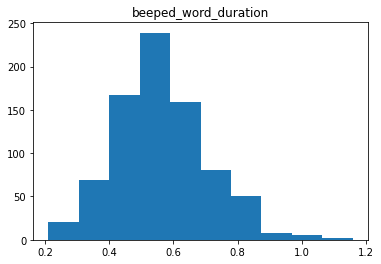

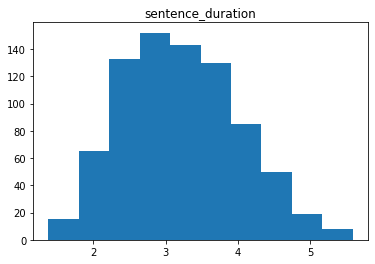

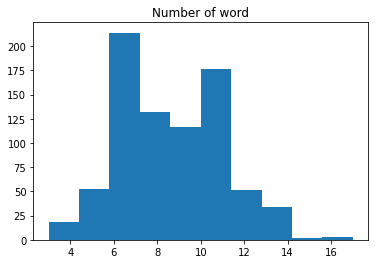

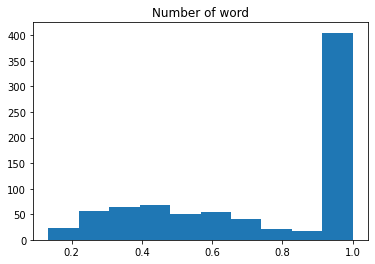

In [12]:

print('Number of censored word locating at last: {0}'.format(
    all_df.SENTENCE_INFO.last_word_flag.sum()))
import matplotlib.pyplot as plt
plt.figure()
plt.hist(all_df.SENTENCE_INFO.beeped_word_duration.values)
plt.title('beeped_word_duration')
plt.figure()
plt.hist(all_df.SENTENCE_INFO.sentence_duration.values)
plt.title('sentence_duration')
plt.figure()
plt.hist(all_df.META_INFO.n_tag.values)
plt.title('Number of word')
plt.figure()
plt.hist(all_df.SENTENCE_INFO.beeped_word_timestamp_end.values/
         all_df.SENTENCE_INFO.sentence_duration.values)
plt.title('Timestamp of the end of censored word/')

In [80]:

file_loc = '/home/jxu/File/Experiment/NIBS/Sync/NIBS_paradigm/text/'
file_name = 'jxu.xlsx'
excel_df = pd.read_excel(file_loc + file_name)
ccc =  all_df.sen_content.values   
ddd = excel_df.beeped_sen_content.values 
aaa = all_df.censored_word.values
bbb= excel_df.verb.values
el = []
for i in range(len(aaa)):
    if ccc[i] != ddd[i]:
        print(aaa[i] + bbb[i])
        print(ccc[i] + ddd[i])
        el.append(i)



print(el)

[]


In [81]:
len(ccc)

800

In [87]:
all_df.censored_word_id_relative.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
all_df.permanent_index.values == np.arange(1,801)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,